# Aplicación de redes neuronales multicapa para la predicción del rendimiento académico de estudiantes en prueba de matemáticas del examen Saber 11.º del Icfes

# 1. Lectura de datos - Data Icfes

Iniciamos importando algunas librerias importantes que usaremos a lo largo de este proyecto:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Iniciamos con la lectura de los datos, para ellos, tomaremos la información brindada por DataIcfes con los resultados del examen Saber 11º de los años 2020 al 2022.

In [2]:
# Lectura de datos del archivo original
df20_1 = pd.read_csv('SB11_20201.txt', sep='¬', engine='python') 
df20_2 = pd.read_csv('SB11_20202.txt', sep='¬', engine='python') 

df21_1 = pd.read_csv('SB11_20211.txt', sep='¬', engine='python') 
df21_2 = pd.read_csv('SB11_20212.txt', sep='¬', engine='python') 

df22_1 = pd.read_csv('SB11_20221.txt', sep='¬', engine='python') 
df22_2 = pd.read_csv('SB11_20222.txt', sep='¬', engine='python')

df22_2.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_ESPECIAL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION
0,CC,COLOMBIA,M,10/12/2000,20224,SB11202240576111,ESTUDIANTE,COLOMBIA,Si,CASANARE,...,24,1,1,138,NaN,1.0,NaN,NaN,2.0,PUBLICAR
1,CC,COLOMBIA,M,06/12/2001,20224,SB11202240348492,ESTUDIANTE,COLOMBIA,Si,ARAUCA,...,26,1,2,142,NaN,1.0,46.850625,2.0,2.0,PUBLICAR
2,CC,COLOMBIA,M,09/08/1976,20224,SB11202240543685,ESTUDIANTE,COLOMBIA,Si,CAUCA,...,32,1,10,148,1.0,1.0,25.786828,1.0,1.0,PUBLICAR
3,CC,COLOMBIA,M,14/06/1993,20224,SB11202240543401,ESTUDIANTE,COLOMBIA,Si,CAUCA,...,24,1,1,120,1.0,1.0,NaN,NaN,1.0,PUBLICAR
4,CC,COLOMBIA,M,07/02/1976,20224,SB11202240543298,ESTUDIANTE,COLOMBIA,Si,CAUCA,...,27,1,3,110,1.0,1.0,32.523512,1.0,1.0,PUBLICAR


Inicialmente, veamos con cuantas variables contamos cada año:

In [3]:
# Creamos un dataframe con la cantidad de filas y columnas de cada examen
datos = pd.DataFrame({
    'DataFrame': ['df20_1', 'df20_2', 'df21_1','df21_2', 'df22_1', 'df22_2'],
    'Filas': [len(df20_1), len(df20_2), len(df21_1),len(df21_2), len(df22_1), len(df22_2)],
    'Columnas': [len(df20_1.columns), len(df20_2.columns), len(df21_1.columns),len(df21_2.columns), len(df22_1.columns), len(df22_2.columns)]
    })

datos

,DataFrame,Filas,Columnas
0,df20_1,15435,81
1,df20_2,504872,81
2,df21_1,15528,78
3,df21_2,532979,82
4,df22_1,20049,81
5,df22_2,532792,81


Ya que no contamos con la misma cantidad de variables, solo conservaremos las que sean comunes entre todos los años:

In [4]:
# Obtener las columnas de cada dataframe
columnas_df20_1 = set(df20_1.columns)
columnas_df20_2 = set(df20_2.columns)
columnas_df21_1 = set(df21_1.columns)
columnas_df21_2 = set(df21_2.columns)
columnas_df22_1 = set(df22_1.columns)
columnas_df22_2 = set(df22_2.columns)

# Calcular la intersección de columnas
columnas_comunes = list(columnas_df20_1.intersection(
    columnas_df20_2,
    columnas_df21_1,
    columnas_df21_2,
    columnas_df22_1,
    columnas_df22_2
))

# Conservar solo las columnas en común en cada dataframe
df20_1 = df20_1[columnas_comunes]
df20_2 = df20_2[columnas_comunes]
df21_1 = df21_1[columnas_comunes]
df21_2 = df21_2[columnas_comunes]
df22_1 = df22_1[columnas_comunes]
df22_2 = df22_2[columnas_comunes]


Comprobemos que efectivamente ahora contamos con la misma cantidad de variables:

In [5]:
datos = pd.DataFrame({
    'DataFrame': ['df20_1', 'df20_2', 'df21_1','df21_2', 'df22_1', 'df22_2'],
    'Filas': [len(df20_1), len(df20_2), len(df21_1),len(df21_2), len(df22_1), len(df22_2)],
    'Columnas': [len(df20_1.columns), len(df20_2.columns), len(df21_1.columns),len(df21_2.columns), len(df22_1.columns), len(df22_2.columns)]
    })

datos

,DataFrame,Filas,Columnas
0,df20_1,15435,77
1,df20_2,504872,77
2,df21_1,15528,77
3,df21_2,532979,77
4,df22_1,20049,77
5,df22_2,532792,77


Finalmente, creemos un nuevo DataFrame con todos los datos de los examenes para empezar con el preprocesamiento de estos

In [6]:
# Unimos todos los dataframes en uno único
df = pd.concat([df20_1, df20_2, df21_1, df21_2, df22_1, df22_2], ignore_index=True)
df.head()

,DESEMP_LECTURA_CRITICA,COLE_DEPTO_UBICACION,ESTU_TIENEETNIA,FAMI_TIENEMOTOCICLETA,COLE_NOMBRE_SEDE,FAMI_COMELECHEDERIVADOS,FAMI_TRABAJOLABORMADRE,PUNT_LECTURA_CRITICA,ESTU_TIPODOCUMENTO,ESTU_COD_DEPTO_PRESENTACION,...,PERCENTIL_C_NATURALES,PERCENTIL_MATEMATICAS,ESTU_COD_RESIDE_DEPTO,PERCENTIL_GLOBAL,ESTU_FECHANACIMIENTO,ESTU_PRIVADO_LIBERTAD,COLE_COD_MCPIO_UBICACION,FAMI_TIENECOMPUTADOR,ESTU_ESTUDIANTE,FAMI_TIENESERVICIOTV
0,2,CESAR,No,No,I.E. MANUEL RODRIGUEZ TORICES,1 o 2 veces por semana,Trabaja por cuenta propia (por ejemplo plomero...,39,CC,20.0,...,6,4,20.0,2.0,01/01/1985,N,20750.0,No,ESTUDIANTE,No
1,2,NARIÑO,No,NaN,INSTITUTO DE EDUCACIÓN TECNICA INESUR - SEDE P...,NaN,NaN,41,CC,52.0,...,10,12,52.0,10.0,01/01/1995,N,52356.0,NaN,ESTUDIANTE,NaN
2,2,CAUCA,Si,No,COORPORACION EDUCATIVA DEL SUR OCCIDENTE COLOM...,1 o 2 veces por semana,"Trabaja en el hogar, no trabaja o estudia",37,CC,19.0,...,4,7,19.0,2.0,01/01/1997,N,19001.0,No,ESTUDIANTE,No
3,2,PUTUMAYO,No,Si,NUEVO INSTITUTO DE APRENDIZAJE SURCOLOMBIANO -...,1 o 2 veces por semana,"Trabaja como profesional (por ejemplo médico, ...",38,CC,86.0,...,10,13,86.0,6.0,01/01/2001,N,86001.0,Si,ESTUDIANTE,No
4,3,RISARALDA,No,No,COL FUNDACION LIC INGLES,Todos o casi todos los días,"Trabaja en el hogar, no trabaja o estudia",58,CC,66.0,...,32,25,66.0,39.0,01/02/2001,N,66001.0,Si,ESTUDIANTE,Si


In [7]:
df.shape

(1621655, 77)

## 2. Analítica Descriptiva y Preprocesamiento

Empecemos ahora con la exploración de las variables, la elección de nuestra variable respuesta y las variables predictoras:

In [8]:
df.columns

Index(['DESEMP_LECTURA_CRITICA', 'COLE_DEPTO_UBICACION', 'ESTU_TIENEETNIA',
       'FAMI_TIENEMOTOCICLETA', 'COLE_NOMBRE_SEDE', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_TRABAJOLABORMADRE', 'PUNT_LECTURA_CRITICA', 'ESTU_TIPODOCUMENTO',
       'ESTU_COD_DEPTO_PRESENTACION', 'COLE_NOMBRE_ESTABLECIMIENTO',
       'COLE_NATURALEZA', 'COLE_AREA_UBICACION', 'DESEMP_MATEMATICAS',
       'ESTU_COD_MCPIO_PRESENTACION', 'DESEMP_SOCIALES_CIUDADANAS',
       'ESTU_HORASSEMANATRABAJA', 'COLE_JORNADA', 'ESTU_MCPIO_PRESENTACION',
       'DESEMP_INGLES', 'ESTU_PAIS_RESIDE', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENEINTERNET', 'PERCENTIL_INGLES', 'COLE_COD_DEPTO_UBICACION',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'ESTU_DEPTO_RESIDE', 'COLE_SEDE_PRINCIPAL', 'COLE_CALENDARIO',
       'FAMI_EDUCACIONMADRE', 'DESEMP_C_NATURALES', 'FAMI_TIENEAUTOMOVIL',
       'PUNT_GLOBAL', 'ESTU_DEPTO_PRESENTACION', 'ESTU_DEDICACIONINTERNET',
       'PERCENTIL_LECTURA_CRITICA', 'PUNT_MA

### 2.1. Variable respuesta

Las variables que intentaremos predecir son todas las que tienen relación con el desempeño del estudiante en el área de matemáticas, entre las variables que contamos podemos encontrar estas 3:
* Percentil matemáticas: numérica int de 1 a 100
* Desempeño matemáticas: categórica de 1 a 4
* Puntaje matemáticas: numérica int de 0 a 100

In [9]:
X = df[['PERCENTIL_MATEMATICAS','DESEMP_MATEMATICAS','PUNT_MATEMATICAS']]
X.head()

,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_MATEMATICAS
0,4,1,32
1,12,2,41
2,7,2,36
3,13,2,42
4,25,2,50


Veamos un gráfico inicial de como se distribuyen estas variables:

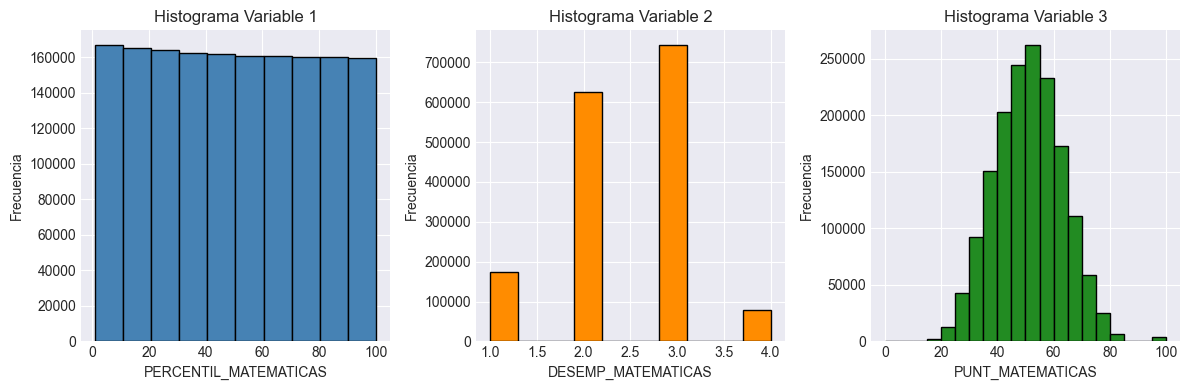

In [10]:
import matplotlib.pyplot as plt

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')

# Crear los histogramas de las tres variables
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Histograma de la primera variable
axes[0].hist(X['PERCENTIL_MATEMATICAS'], color='steelblue', edgecolor='black')
axes[0].set_xlabel('PERCENTIL_MATEMATICAS')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma Variable 1')

# Histograma de la segunda variable
axes[1].hist(X['DESEMP_MATEMATICAS'], color='darkorange', edgecolor='black')
axes[1].set_xlabel('DESEMP_MATEMATICAS')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma Variable 2')

# Histograma de la tercera variable
axes[2].hist(X['PUNT_MATEMATICAS'], color='forestgreen', edgecolor='black',bins=20)
axes[2].set_xlabel('PUNT_MATEMATICAS')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('Histograma Variable 3')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()


Teniendo en cuenta que el desempeño o nivel de desempeño resume los resultados de cada estudiante, tomaremos este para realizar nuestra predicción, en este caso nuestra variable respuesta será 'DESEMP_MATEMATICAS'.

### 2.2. Variables predictoras

Por otro lado, las variables que consideraremos como predictoras, serán todas aquellas que se tienen antes del examen, como los aspectos socioeconómicos

In [11]:
df2 = df[['DESEMP_MATEMATICAS','FAMI_CUARTOSHOGAR', 'COLE_MCPIO_UBICACION','COLE_DEPTO_UBICACION',
        'ESTU_GENERO', 'ESTU_DEDICACIONLECTURADIARIA', 'FAMI_ESTRATOVIVIENDA', 'COLE_CARACTER',
       'ESTU_DEDICACIONINTERNET', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_PERSONASHOGAR', 'COLE_NATURALEZA', 'FAMI_NUMLIBROS', 
        'PERIODO', 'ESTU_TIENEETNIA', 'FAMI_TIENEAUTOMOVIL', 'COLE_AREA_UBICACION', 'FAMI_TIENESERVICIOTV',
       'COLE_CALENDARIO', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'COLE_GENERO',
       'FAMI_TIENEINTERNET', 'ESTU_HORASSEMANATRABAJA', 'COLE_BILINGUE']]
df2.head()

,DESEMP_MATEMATICAS,FAMI_CUARTOSHOGAR,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION,ESTU_GENERO,ESTU_DEDICACIONLECTURADIARIA,FAMI_ESTRATOVIVIENDA,COLE_CARACTER,ESTU_DEDICACIONINTERNET,FAMI_COMECARNEPESCADOHUEVO,...,FAMI_TIENEAUTOMOVIL,COLE_AREA_UBICACION,FAMI_TIENESERVICIOTV,COLE_CALENDARIO,FAMI_COMELECHEDERIVADOS,FAMI_TIENECONSOLAVIDEOJUEGOS,COLE_GENERO,FAMI_TIENEINTERNET,ESTU_HORASSEMANATRABAJA,COLE_BILINGUE
0,1,Uno,SAN DIEGO,CESAR,F,No leo por entretenimiento,Estrato 1,TÉCNICO/ACADÉMICO,No Navega Internet,1 o 2 veces por semana,...,No,URBANO,No,A,1 o 2 veces por semana,No,MIXTO,No,Más de 30 horas,S
1,2,NaN,IPIALES,NARIÑO,F,NaN,NaN,NaN,NaN,NaN,...,NaN,URBANO,NaN,A,NaN,NaN,MIXTO,NaN,NaN,NaN
2,2,Cuatro,POPAYÁN,CAUCA,F,30 minutos o menos,Estrato 1,ACADÉMICO,No Navega Internet,NaN,...,No,URBANO,No,OTRO,1 o 2 veces por semana,No,MIXTO,No,Entre 11 y 20 horas,NaN
3,2,Uno,MOCOA,PUTUMAYO,F,30 minutos o menos,Estrato 1,TÉCNICO/ACADÉMICO,Entre 1 y 3 horas,3 a 5 veces por semana,...,No,URBANO,No,A,1 o 2 veces por semana,No,MIXTO,Si,Entre 11 y 20 horas,NaN
4,2,Cuatro,PEREIRA,RISARALDA,F,No leo por entretenimiento,Estrato 6,ACADÉMICO,Más de 3 horas,Todos o casi todos los días,...,Si,RURAL,Si,B,Todos o casi todos los días,No,MIXTO,Si,0,S


### 2.2.1. Valores nulos

In [12]:
df2.isnull().sum()

DESEMP_MATEMATICAS                   0
FAMI_CUARTOSHOGAR                58502
COLE_MCPIO_UBICACION                 1
COLE_DEPTO_UBICACION                 1
ESTU_GENERO                        110
ESTU_DEDICACIONLECTURADIARIA     76853
FAMI_ESTRATOVIVIENDA             86028
COLE_CARACTER                    56560
ESTU_DEDICACIONINTERNET          79205
FAMI_COMECARNEPESCADOHUEVO       78357
FAMI_TIENECOMPUTADOR             62462
FAMI_PERSONASHOGAR               55996
COLE_NATURALEZA                      1
FAMI_NUMLIBROS                  107298
PERIODO                              0
ESTU_TIENEETNIA                   8145
FAMI_TIENEAUTOMOVIL              62463
COLE_AREA_UBICACION                  1
FAMI_TIENESERVICIOTV             78800
COLE_CALENDARIO                      1
FAMI_COMELECHEDERIVADOS          86332
FAMI_TIENECONSOLAVIDEOJUEGOS     62185
COLE_GENERO                          1
FAMI_TIENEINTERNET               75095
ESTU_HORASSEMANATRABAJA          59440
COLE_BILINGUE            

Teniendo en cuenta que muchas de las variable son nulas para algunos registros, vamos a eliminar estas filas:

In [13]:
df2 = df2.dropna()

In [14]:
df2.shape

(1177648, 26)

### 2.2.2. FAMI_CUARTOSHOGAR

In [15]:
df2['FAMI_CUARTOSHOGAR'].value_counts()

FAMI_CUARTOSHOGAR
Tres          467866
Dos           431329
Cuatro        152299
Uno            58704
Cinco          44458
Seis o mas     22992
Name: count, dtype: int64

In [16]:
df2['FAMI_CUARTOSHOGAR'].describe()

count     1177648
unique          6
top          Tres
freq       467866
Name: FAMI_CUARTOSHOGAR, dtype: object

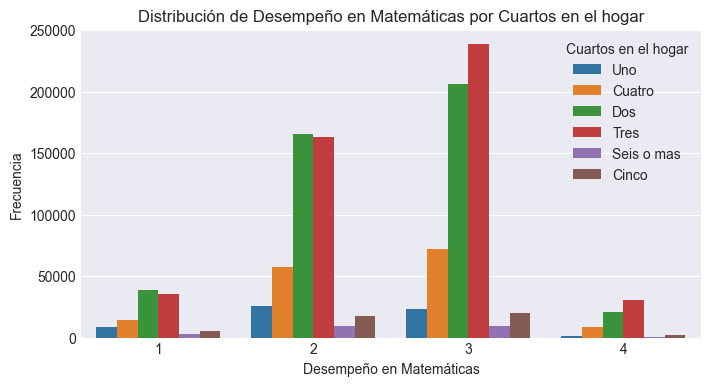

In [17]:
# Crear el gráfico de barras apiladas utilizando Seaborn
plt.figure(figsize=(8, 4))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='FAMI_CUARTOSHOGAR', palette='tab10', dodge=True)
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Cuartos en el hogar')
plt.legend(title='Cuartos en el hogar')
plt.show()

In [18]:
# Reemplazar los valores en la columna FAMI_ESTRATOVIVIENDA utilizando el diccionario de equivalencias
equivalencias = {"Uno": 1, "Dos": 2,"Tres": 3, "Cuatro": 4, "Cinco": 5, "Seis o mas": 6}
df2["FAMI_CUARTOSHOGAR"] = df2["FAMI_CUARTOSHOGAR"].replace(equivalencias)

In [19]:
df2['FAMI_CUARTOSHOGAR'].value_counts()

FAMI_CUARTOSHOGAR
3    467866
2    431329
4    152299
1     58704
5     44458
6     22992
Name: count, dtype: int64

In [20]:
df2['FAMI_CUARTOSHOGAR'].describe()

count    1.177648e+06
mean     2.797439e+00
std      9.902881e-01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: FAMI_CUARTOSHOGAR, dtype: float64

### 2.2.3. COLE_MCPIO_UBICACION

In [21]:
df2['COLE_MCPIO_UBICACION'].value_counts()

COLE_MCPIO_UBICACION
BOGOTÁ D.C.             181430
MEDELLÍN                 65042
CALI                     47724
BARRANQUILLA             35189
CARTAGENA DE INDIAS      27568
                         ...  
TUNUNGUÁ                    32
TARAPACÁ                    31
SIPÍ                        28
ALMEIDA                     27
SAN PEDRO DE CARTAGO        19
Name: count, Length: 1021, dtype: int64

In [22]:
df2['COLE_MCPIO_UBICACION'].describe()

count         1177648
unique           1021
top       BOGOTÁ D.C.
freq           181430
Name: COLE_MCPIO_UBICACION, dtype: object

In [23]:
181430/1177648

0.15406131543551213

Haremos una recategorización, dandole valor 1 a esta variable si pertenece a una ciudad grande lo cual lo definiremos tomando los primeros 10 municipios con más estudiantes que presentaron la prueba.

In [24]:
# Calcular el recuento de valores en la columna COLE_MCPIO_UBICACION
value_counts = df2['COLE_MCPIO_UBICACION'].value_counts()

# Crear la variable COLE_MCPIO_GRANDE
df2['COLE_MCPIO_GRANDE'] = df2['COLE_MCPIO_UBICACION'].apply(lambda x: 1 if value_counts[x] > 10000 else 0)

In [25]:
df2.drop('COLE_MCPIO_UBICACION',axis=1,inplace=True)
df2['COLE_MCPIO_GRANDE'].value_counts()

COLE_MCPIO_GRANDE
0    647125
1    530523
Name: count, dtype: int64

### 2.2.3. COLE_MCPIO_UBICACION

In [26]:
df2['COLE_DEPTO_UBICACION'].value_counts()

COLE_DEPTO_UBICACION
BOGOTÁ             181430
ANTIOQUIA          161956
VALLE              100489
CUNDINAMARCA        75596
ATLANTICO           65411
SANTANDER           57290
BOLIVAR             54446
CORDOBA             41562
TOLIMA              37432
BOYACA              37362
NORTE SANTANDER     36903
NARIÑO              36485
MAGDALENA           32021
CESAR               28044
HUILA               27537
CAUCA               27199
META                24457
CALDAS              24238
RISARALDA           22747
SUCRE               22462
LA GUAJIRA          16952
QUINDIO             13660
CASANARE            12205
CHOCO                9210
PUTUMAYO             8358
CAQUETA              8148
ARAUCA               7039
GUAVIARE             1757
SAN ANDRES           1408
AMAZONAS             1305
VICHADA              1180
VAUPES                720
GUAINIA               639
Name: count, dtype: int64

In [27]:
# Calcular el recuento de valores en la columna COLE_MCPIO_UBICACION
value_counts = df2['COLE_DEPTO_UBICACION'].value_counts()

# Crear la variable COLE_MCPIO_GRANDE
df2['COLE_DEPTO_GRANDE'] = df2['COLE_DEPTO_UBICACION'].apply(lambda x: 1 if value_counts[x] > 50000 else 0)

In [28]:
df2.drop('COLE_DEPTO_UBICACION',axis=1,inplace=True)
df2['COLE_DEPTO_GRANDE'].value_counts()

COLE_DEPTO_GRANDE
1    696618
0    481030
Name: count, dtype: int64

In [29]:
696618/(696618+481030)

0.5915332934798854

### 2.2.4. ESTU_GENERO

In [30]:
df2['ESTU_GENERO'].value_counts()

ESTU_GENERO
F    648403
M    529245
Name: count, dtype: int64

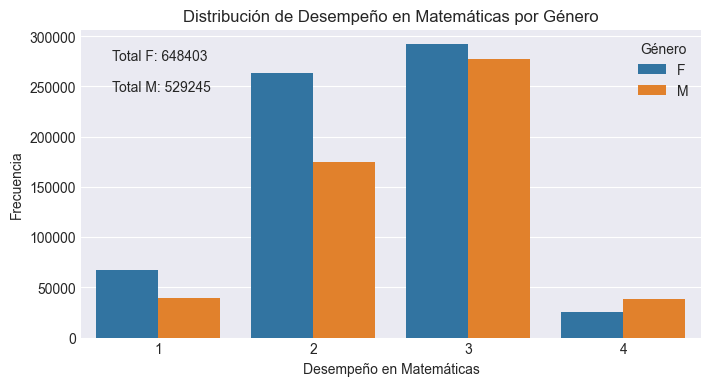

In [31]:
# Crear el gráfico de barras apiladas utilizando Seaborn
plt.figure(figsize=(8, 4))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='ESTU_GENERO', palette='tab10', dodge=True)
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Género')
plt.legend(title='Género')

# Calcular el total de registros para cada categoría de ESTU_GENERO
total_por_genero = df2['ESTU_GENERO'].value_counts()

# Agregar el total general de cada categoría de ESTU_GENERO en el gráfico
ax = plt.gca()
for i, (gen, total) in enumerate(total_por_genero.items()):
    ax.annotate(f'Total {gen}: {total}', xy=(0.05, 0.9 - 0.1 * i), xycoords='axes fraction', fontsize=10)

plt.show()

In [32]:
# Crear la variable ESTU_MASC
df2['ESTU_MASC'] = df2['ESTU_GENERO'].apply(lambda x: 1 if x == 'M' else 0)
df2.drop('ESTU_GENERO',axis=1,inplace=True)
df2['ESTU_MASC'].value_counts()

ESTU_MASC
0    648403
1    529245
Name: count, dtype: int64

### 2.2.5. ESTU_DEDICACIONLECTURADIARIA

In [33]:
df2['ESTU_DEDICACIONLECTURADIARIA'].value_counts()

ESTU_DEDICACIONLECTURADIARIA
30 minutos o menos            447476
Entre 30 y 60 minutos         316946
No leo por entretenimiento    238870
Entre 1 y 2 horas             121002
Más de 2 horas                 53354
Name: count, dtype: int64

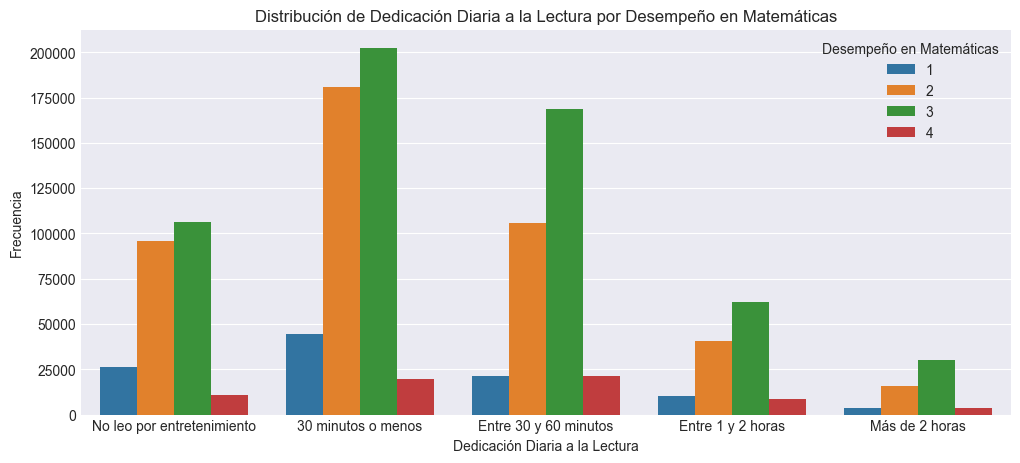

In [34]:
# Crear el gráfico de barras utilizando Seaborn con la variable 'DESEMP_MATEMATICAS' como color
plt.figure(figsize=(12, 5))
sns.countplot(data=df2, x='ESTU_DEDICACIONLECTURADIARIA', hue='DESEMP_MATEMATICAS', palette='tab10')
plt.xlabel('Dedicación Diaria a la Lectura')
plt.ylabel('Frecuencia')
plt.title('Distribución de Dedicación Diaria a la Lectura por Desempeño en Matemáticas')
plt.legend(title='Desempeño en Matemáticas', loc='upper right')
plt.show()

In [35]:
# Definir el diccionario de mapeo de valores
mapeo_valores = {
    '30 minutos o menos': 1,
    'Entre 30 y 60 minutos': 2,
    'No leo por entretenimiento': 0,
    'Entre 1 y 2 horas': 3,
    'Más de 2 horas': 4
}

# Aplicar el mapeo de valores a la columna ESTU_DEDICACIONLECTURADIARIA
df2['ESTU_DEDICACIONLECTURADIARIA'] = df2['ESTU_DEDICACIONLECTURADIARIA'].replace(mapeo_valores)

### 2.2.6. FAMI_ESTRATOVIVIENDA

In [36]:
df2['FAMI_ESTRATOVIVIENDA'].value_counts()

FAMI_ESTRATOVIVIENDA
Estrato 2      434157
Estrato 1      340128
Estrato 3      262953
Estrato 4       67627
Sin Estrato     35090
Estrato 5       24051
Estrato 6       13642
Name: count, dtype: int64

In [37]:
# Definir el diccionario de mapeo de valores
mapeo_valores = {
    'Estrato 2': 2,
    'Estrato 1': 1,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Sin Estrato': 0,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Aplicar el mapeo de valores a la columna FAMI_ESTRATOVIVIENDA en el DataFrame df2
df2['FAMI_ESTRATOVIVIENDA'] = df2['FAMI_ESTRATOVIVIENDA'].replace(mapeo_valores)


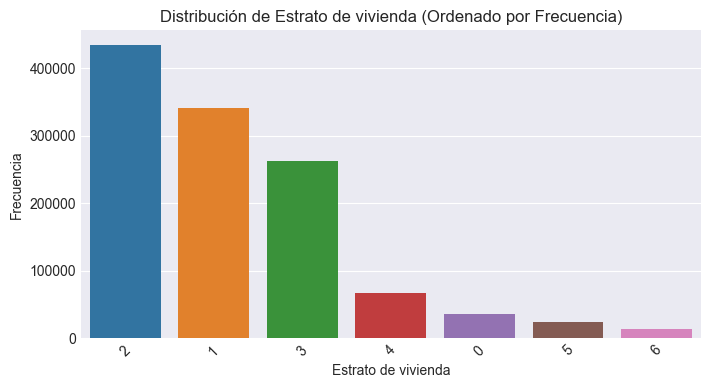

In [38]:
# Obtener el recuento de cada categoría y ordenarlas por frecuencia descendente
estrato_counts = df2['FAMI_ESTRATOVIVIENDA'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras utilizando Seaborn con las categorías ordenadas
plt.figure(figsize=(8, 4))
sns.countplot(data=df2, x='FAMI_ESTRATOVIVIENDA', palette='tab10', order=estrato_counts.index)
plt.xlabel('Estrato de vivienda')
plt.ylabel('Frecuencia')
plt.title('Distribución de Estrato de vivienda (Ordenado por Frecuencia)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

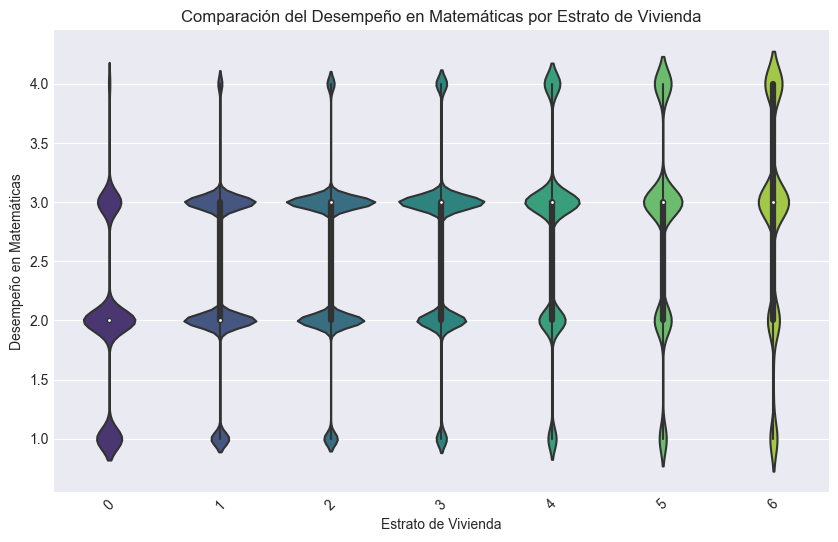

In [39]:
plt.figure(figsize=(10, 6))
order = sorted(df2['FAMI_ESTRATOVIVIENDA'].unique())  # Ordena los estratos únicos
sns.violinplot(data=df2, x='FAMI_ESTRATOVIVIENDA', y='DESEMP_MATEMATICAS', palette='viridis', order=order)
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Desempeño en Matemáticas')
plt.title('Comparación del Desempeño en Matemáticas por Estrato de Vivienda')
plt.xticks(rotation=45)
plt.show()

### 2.2.7. COLE_CARACTER

In [40]:
df2['COLE_CARACTER'].value_counts()

COLE_CARACTER
ACADÉMICO            602279
TÉCNICO/ACADÉMICO    433199
TÉCNICO              140541
NO APLICA              1629
Name: count, dtype: int64

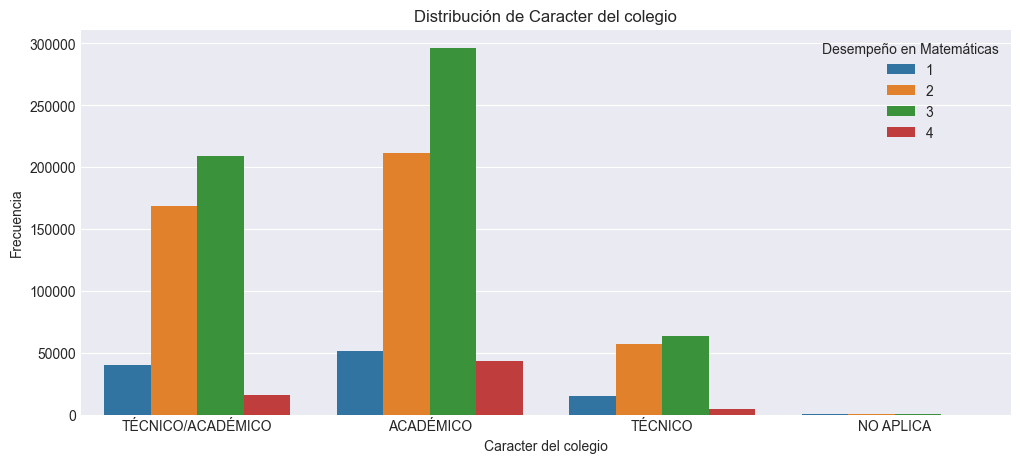

In [41]:
# Crear el gráfico de barras utilizando Seaborn con la variable 'DESEMP_MATEMATICAS' como color
plt.figure(figsize=(12, 5))
sns.countplot(data=df2, x='COLE_CARACTER', hue='DESEMP_MATEMATICAS', palette='tab10')
plt.xlabel('Caracter del colegio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Caracter del colegio')
plt.legend(title='Desempeño en Matemáticas', loc='upper right')
plt.show()

In [42]:
# Definir el diccionario de mapeo de valores
mapeo_valores = {
    'ACADÉMICO': 0,
    'TÉCNICO/ACADÉMICO': 1,
    'TÉCNICO': 1,
    'NO APLICA': 0
}

# Crear la variable COLE_TECNICO utilizando la función apply
df2['COLE_TECNICO'] = df2['COLE_CARACTER'].apply(lambda x: mapeo_valores[x])

In [43]:
df2.drop('COLE_CARACTER',axis=1,inplace=True)
df2['COLE_TECNICO'].value_counts()

COLE_TECNICO
0    603908
1    573740
Name: count, dtype: int64

### 2.2.8. ESTU_DEDICACIONINTERNET

In [44]:
df2['ESTU_DEDICACIONINTERNET'].value_counts()

ESTU_DEDICACIONINTERNET
Entre 1 y 3 horas        381865
Más de 3 horas           317804
Entre 30 y 60 minutos    271121
30 minutos o menos       153653
No Navega Internet        53205
Name: count, dtype: int64

In [45]:
# Definir el diccionario de mapeo de valores
mapeo_valores = {
    'Entre 1 y 3 horas': 3,
    'Más de 3 horas': 4,
    'Entre 30 y 60 minutos': 2,
    '30 minutos o menos': 1,
    'No Navega Internet': 0
}

# Aplicar el mapeo de valores a la columna ESTU_DEDICACIONINTERNET
df2['ESTU_DEDICACIONINTERNET'] = df2['ESTU_DEDICACIONINTERNET'].replace(mapeo_valores)

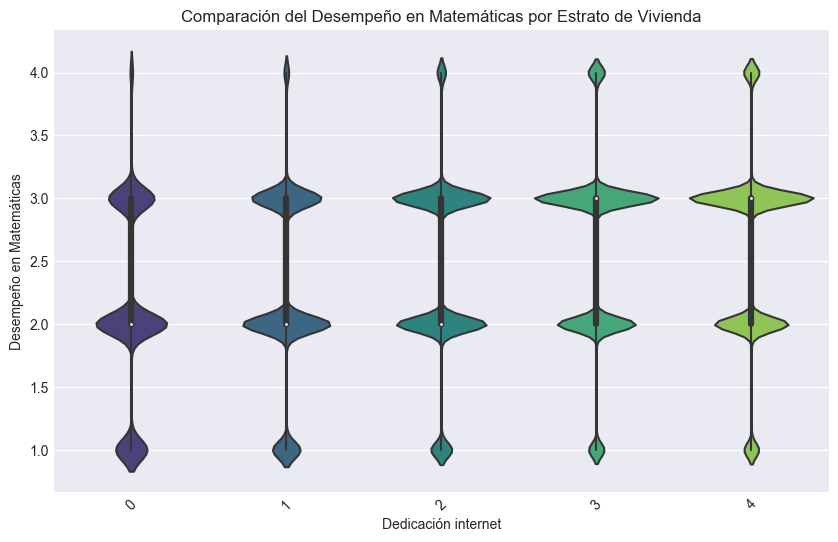

In [46]:
plt.figure(figsize=(10, 6))
order = sorted(df2['ESTU_DEDICACIONINTERNET'].unique())  # Ordena los estratos únicos
sns.violinplot(data=df2, x='ESTU_DEDICACIONINTERNET', y='DESEMP_MATEMATICAS', palette='viridis', order=order)
plt.xlabel('Dedicación internet')
plt.ylabel('Desempeño en Matemáticas')
plt.title('Comparación del Desempeño en Matemáticas por Estrato de Vivienda')
plt.xticks(rotation=45)
plt.show()

#### 2.2.9. FAMI_COMECARNEPESCADOHUEVO

In [47]:
df2['FAMI_COMECARNEPESCADOHUEVO'].value_counts()

FAMI_COMECARNEPESCADOHUEVO
Todos o casi todos los días     469743
3 a 5 veces por semana          361124
1 o 2 veces por semana          290619
Nunca o rara vez comemos eso     56162
Name: count, dtype: int64

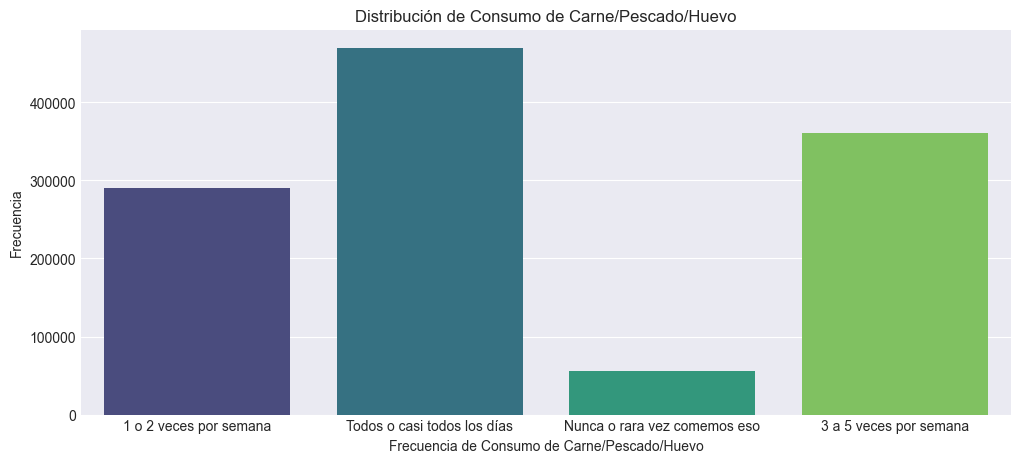

In [48]:
# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 5))
sns.countplot(data=df2, x='FAMI_COMECARNEPESCADOHUEVO', palette='viridis')  # Cambia la paleta de colores si lo deseas
plt.xlabel('Frecuencia de Consumo de Carne/Pescado/Huevo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Consumo de Carne/Pescado/Huevo')
plt.show()

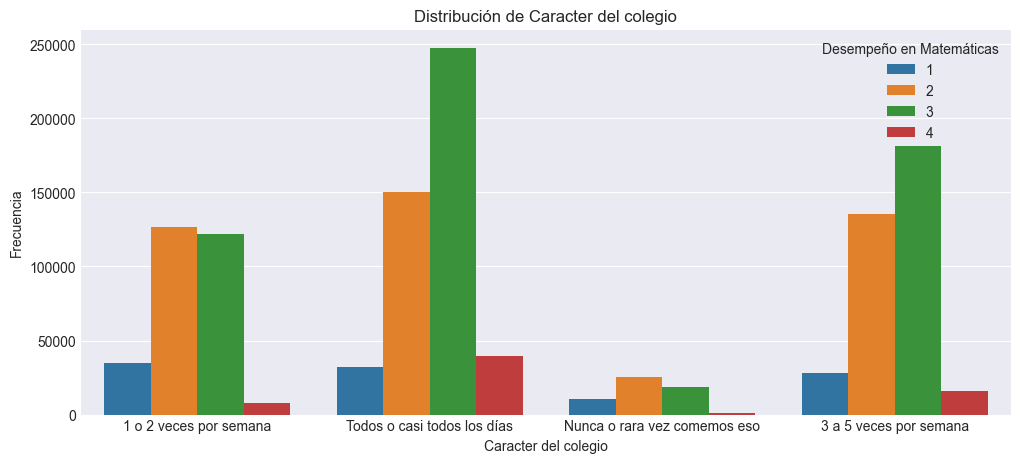

In [49]:
# Crear el gráfico de barras utilizando Seaborn con la variable 'DESEMP_MATEMATICAS' como color
plt.figure(figsize=(12, 5))
sns.countplot(data=df2, x='FAMI_COMECARNEPESCADOHUEVO', hue='DESEMP_MATEMATICAS', palette='tab10')
plt.xlabel('Caracter del colegio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Caracter del colegio')
plt.legend(title='Desempeño en Matemáticas', loc='upper right')
plt.show()

In [50]:
# Definir el diccionario de mapeo de valores
mapeo_valores = {
    'Todos o casi todos los días': 3,
    '3 a 5 veces por semana': 2,
    '1 o 2 veces por semana': 1,
    'Nunca o rara vez comemos eso': 0
}

# Aplicar el mapeo de valores a la columna FAMI_COMECARNEPESCADOHUEVO
df2['FAMI_COMECARNEPESCADOHUEVO'] = df2['FAMI_COMECARNEPESCADOHUEVO'].replace(mapeo_valores)

In [51]:
df2['FAMI_COMECARNEPESCADOHUEVO'].value_counts()

FAMI_COMECARNEPESCADOHUEVO
3    469743
2    361124
1    290619
0     56162
Name: count, dtype: int64

### 2.2.10. FAMI_TIENECOMPUTADOR

In [52]:
df2['FAMI_TIENECOMPUTADOR'].value_counts()

FAMI_TIENECOMPUTADOR
Si    706685
No    470963
Name: count, dtype: int64

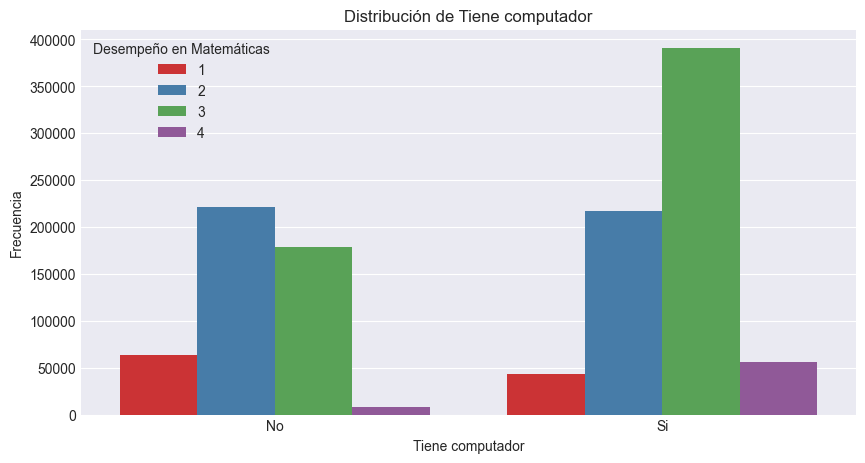

In [53]:
# Crear el gráfico de barras utilizando Seaborn con la variable 'DESEMP_MATEMATICAS' como color
plt.figure(figsize=(10, 5))
sns.countplot(data=df2, x='FAMI_TIENECOMPUTADOR', hue='DESEMP_MATEMATICAS', palette='Set1')
plt.xlabel('Tiene computador')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tiene computador')
plt.legend(title='Desempeño en Matemáticas', loc='upper left')
plt.show()

In [54]:
# Aplicar el mapeo de valores a la columna FAMI_TIENECOMPUTADOR
df2['FAMI_TIENECOMPUTADOR'] = df2['FAMI_TIENECOMPUTADOR'].replace({'Si': 1,'No': 0})
df2['FAMI_TIENECOMPUTADOR'].value_counts()

FAMI_TIENECOMPUTADOR
1    706685
0    470963
Name: count, dtype: int64

In [55]:
df2['FAMI_TIENECOMPUTADOR']

0          0
4          1
7          0
8          1
11         1
          ..
1621649    0
1621650    0
1621651    0
1621653    1
1621654    0
Name: FAMI_TIENECOMPUTADOR, Length: 1177648, dtype: int64

### Personas en el hogar 

In [56]:
df['FAMI_PERSONASHOGAR'].value_counts()

FAMI_PERSONASHOGAR
3 a 4      793681
5 a 6      473640
1 a 2      134799
7 a 8      118267
9 o más     45272
Name: count, dtype: int64

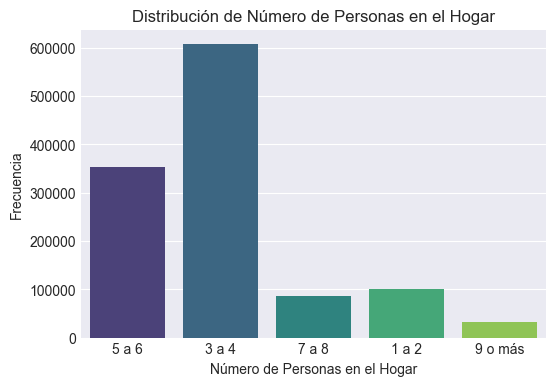

In [57]:
# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='FAMI_PERSONASHOGAR', palette='viridis')  # Cambia la paleta de colores si lo deseas
plt.xlabel('Número de Personas en el Hogar')
plt.ylabel('Frecuencia')
plt.title('Distribución de Número de Personas en el Hogar')
plt.show()

In [58]:
mapeo_valores = {
    '3 a 4': 2,
    '5 a 6': 3,
    '1 a 2': 1,
    '7 a 8': 4,
    '9 o más': 5
}

# Aplicar el mapeo de valores a la columna FAMI_PERSONASHOGAR
df2['FAMI_PERSONASHOGAR'] = df2['FAMI_PERSONASHOGAR'].replace(mapeo_valores)

### 2.2.12. COLE_NATURALEZA

In [59]:
df2['COLE_NATURALEZA'].value_counts()

COLE_NATURALEZA
OFICIAL       910811
NO OFICIAL    266837
Name: count, dtype: int64

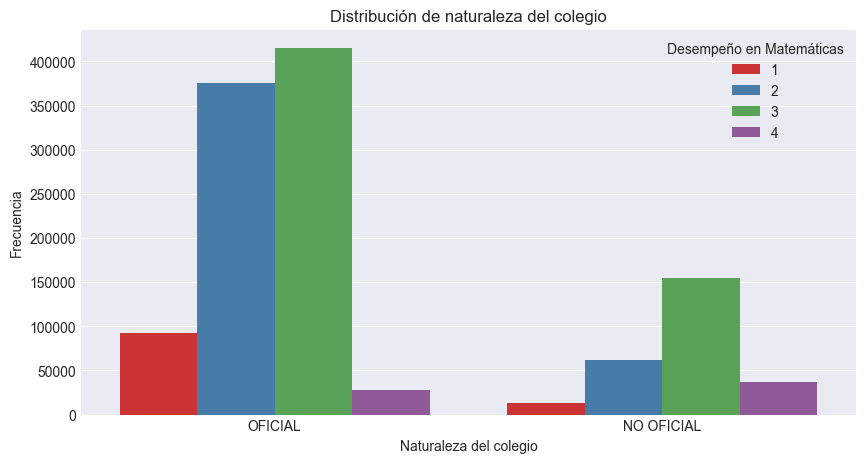

In [60]:
# Crear el gráfico de barras utilizando Seaborn con la variable 'DESEMP_MATEMATICAS' como color
plt.figure(figsize=(10, 5))
sns.countplot(data=df2, x='COLE_NATURALEZA', hue='DESEMP_MATEMATICAS', palette='Set1')
plt.xlabel('Naturaleza del colegio')
plt.ylabel('Frecuencia')
plt.title('Distribución de naturaleza del colegio')
plt.legend(title='Desempeño en Matemáticas', loc='upper right')
plt.show()

In [61]:
# Crear la nueva variable utilizando la función apply
df2['COLE_OFICIAL'] = df2['COLE_NATURALEZA'].apply(lambda x: 1 if x == 'OFICIAL' else 0)
df2.drop('COLE_NATURALEZA',axis=1,inplace=True)
df2['COLE_OFICIAL'].value_counts()

COLE_OFICIAL
1    910811
0    266837
Name: count, dtype: int64

### 2.2.13. FAMI_NUMLIBROS

In [62]:
df2['FAMI_NUMLIBROS'].value_counts()

FAMI_NUMLIBROS
0 A 10 LIBROS        512285
11 A 25 LIBROS       361865
26 A 100 LIBROS      233798
MÁS DE 100 LIBROS     69700
Name: count, dtype: int64

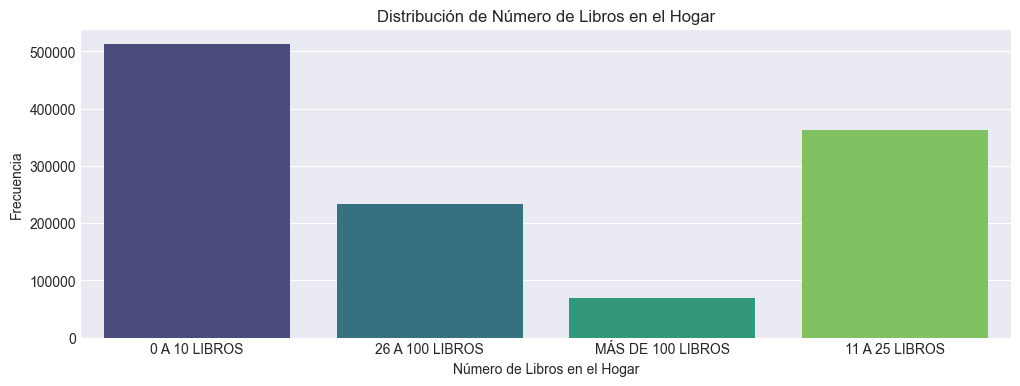

In [63]:
# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 4))
sns.countplot(data=df2, x='FAMI_NUMLIBROS', palette='viridis')  # Cambia la paleta de colores si lo deseas
plt.xlabel('Número de Libros en el Hogar')
plt.ylabel('Frecuencia')
plt.title('Distribución de Número de Libros en el Hogar')
plt.show()

In [64]:
# Definir el diccionario de mapeo de valores
mapeo_valores = {
    '0 A 10 LIBROS': 0,
    '11 A 25 LIBROS': 1,
    '26 A 100 LIBROS': 2,
    'MÁS DE 100 LIBROS': 3
}

# Aplicar el mapeo de valores a la columna FAMI_NUMLIBROS
df2['FAMI_NUMLIBROS'] = df2['FAMI_NUMLIBROS'].replace(mapeo_valores)

### 2.2.14. PERIODO

In [65]:
df2['PERIODO'].value_counts()

PERIODO
20204    385750
20214    382930
20224    374005
20221     13412
20211     10806
20201     10745
Name: count, dtype: int64

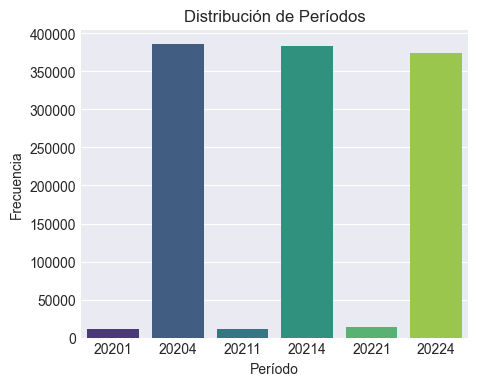

In [66]:
# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df2, x='PERIODO', palette='viridis')  # Cambia la paleta de colores si lo deseas
plt.xlabel('Período')
plt.ylabel('Frecuencia')
plt.title('Distribución de Períodos')
plt.show()

In [67]:
# Convertir la columna 'PERIODO' a cadena (texto)
df2['PERIODO'] = df2['PERIODO'].astype(str)

# Crear una nueva variable 'año' que contiene los primeros 4 dígitos de 'PERIODO'
df2['año'] = df2['PERIODO'].str[:4]

# Crear una nueva variable 'semestre' que contiene el último dígito de 'PERIODO'
df2['semestre'] = df2['PERIODO'].str[-1]

In [68]:
# Crear un diccionario de mapeo para la columna 'año'
mapeo_año = {'2020': 1, '2021': 2, '2022': 3}

# Aplicar el mapeo a la columna 'año'
df2['año'] = df2['año'].map(mapeo_año)

# Crear un diccionario de mapeo para la columna 'semestre'
mapeo_semestre = {'1': 1, '4': 2}

# Aplicar el mapeo a la columna 'semestre'
df2['semestre'] = df2['semestre'].map(mapeo_semestre)

In [69]:
df2.drop('PERIODO',axis=1,inplace=True)

### 2.2.15. ESTU_TIENEETNIA

In [70]:
df2['ESTU_TIENEETNIA'].value_counts()

ESTU_TIENEETNIA
No    1110199
Si      67449
Name: count, dtype: int64

In [71]:
# Crear la nueva variable utilizando la función apply
df2['ESTU_TIENEETNIA'] = df2['ESTU_TIENEETNIA'].apply(lambda x: 1 if x == 'Si' else 0)
df2['ESTU_TIENEETNIA'].value_counts()

ESTU_TIENEETNIA
0    1110199
1      67449
Name: count, dtype: int64

### 2.2.16. FAMI_TIENEAUTOMOVIL

In [72]:
df2['FAMI_TIENEAUTOMOVIL'].value_counts()

FAMI_TIENEAUTOMOVIL
No    855837
Si    321811
Name: count, dtype: int64

In [73]:
# Crear la nueva variable utilizando la función apply
df2['FAMI_TIENEAUTOMOVIL'] = df2['FAMI_TIENEAUTOMOVIL'].apply(lambda x: 1 if x == 'Si' else 0)
df2['FAMI_TIENEAUTOMOVIL'].value_counts()

FAMI_TIENEAUTOMOVIL
0    855837
1    321811
Name: count, dtype: int64

### 2.2.17. COLE_AREA_UBICACION

In [74]:
df2['COLE_AREA_UBICACION'].value_counts()

COLE_AREA_UBICACION
URBANO    1015735
RURAL      161913
Name: count, dtype: int64

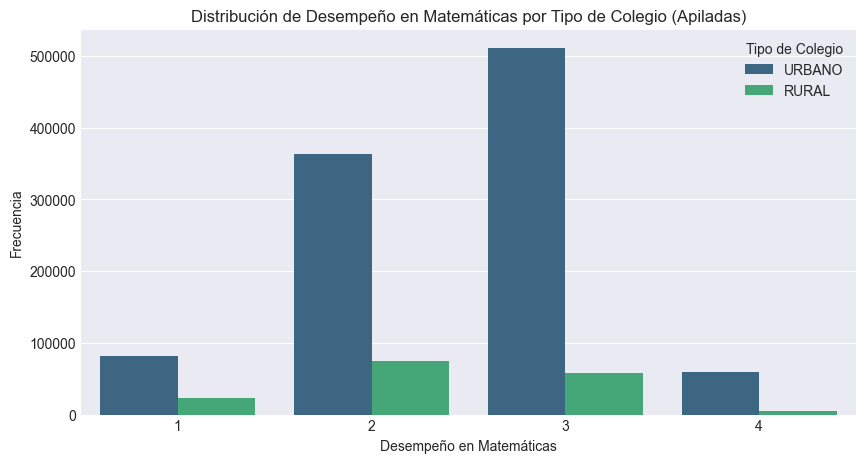

In [75]:
# Crear el gráfico de barras apiladas utilizando Seaborn
plt.figure(figsize=(10, 5))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='COLE_AREA_UBICACION', palette='viridis', dodge=True)
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Tipo de Colegio (Apiladas)')
plt.legend(title='Tipo de Colegio')
plt.show()

In [76]:
# Crear la nueva variable utilizando la función apply
df2['COLE_URBANO'] = df2['COLE_AREA_UBICACION'].apply(lambda x: 1 if x == 'URBANO' else 0)
df2.drop('COLE_AREA_UBICACION',axis=1,inplace=True)
df2['COLE_URBANO'].value_counts()

COLE_URBANO
1    1015735
0     161913
Name: count, dtype: int64

### 2.2.18. FAMI_TIENESERVICIOTV

In [77]:
df2['FAMI_TIENESERVICIOTV'].value_counts()

FAMI_TIENESERVICIOTV
Si    882474
No    295174
Name: count, dtype: int64

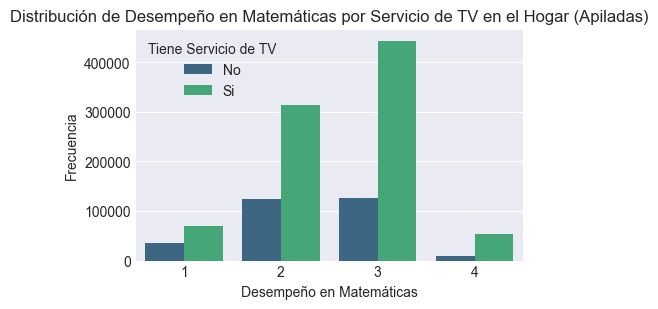

In [78]:
# Crear el gráfico de barras apiladas utilizando Seaborn
plt.figure(figsize=(5, 3))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='FAMI_TIENESERVICIOTV', palette='viridis')
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Servicio de TV en el Hogar (Apiladas)')
plt.legend(title='Tiene Servicio de TV')
plt.show()

In [79]:
# Crear la nueva variable utilizando la función apply
df2['FAMI_TIENESERVICIOTV'] = df2['FAMI_TIENESERVICIOTV'].apply(lambda x: 1 if x == 'Si' else 0)
df2['FAMI_TIENESERVICIOTV'].value_counts()

FAMI_TIENESERVICIOTV
1    882474
0    295174
Name: count, dtype: int64

### 2.2.19. COLE_CALENDARIO

In [80]:
df2['COLE_CALENDARIO'].value_counts()

COLE_CALENDARIO
A       1143213
B         31364
OTRO       3071
Name: count, dtype: int64

In [81]:
1143213/(1143213+31364+3071)

0.9707595138785103

In [82]:
# Crear la nueva variable utilizando la función apply
df2['COLE_CALENDARIO_A'] = df2['COLE_CALENDARIO'].apply(lambda x: 1 if x == 'A' else 0)
df2.drop('COLE_CALENDARIO',axis=1,inplace=True)
df2['COLE_CALENDARIO_A'].value_counts()

COLE_CALENDARIO_A
1    1143213
0      34435
Name: count, dtype: int64

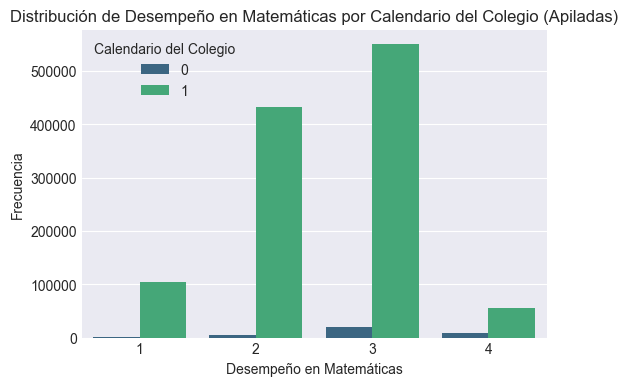

In [83]:
# Crear el gráfico de barras apiladas utilizando Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='COLE_CALENDARIO_A', palette='viridis')
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Calendario del Colegio (Apiladas)')
plt.legend(title='Calendario del Colegio')
plt.show()

### 2.2.20. FAMI_COMELECHEDERIVADOS

In [84]:
df2['FAMI_COMELECHEDERIVADOS'].value_counts()

FAMI_COMELECHEDERIVADOS
1 o 2 veces por semana          406410
Todos o casi todos los días     348211
3 a 5 veces por semana          315429
Nunca o rara vez comemos eso    107598
Name: count, dtype: int64

In [85]:
# Mapear los valores de FAMI_COMELECHEDERIVADOS
mapping = {
    '1 o 2 veces por semana': 1,
    'Todos o casi todos los días': 3,
    '3 a 5 veces por semana': 2,
    'Nunca o rara vez comemos eso': 0
}

df2['FAMI_COMELECHEDERIVADOS'] = df2['FAMI_COMELECHEDERIVADOS'].map(mapping)

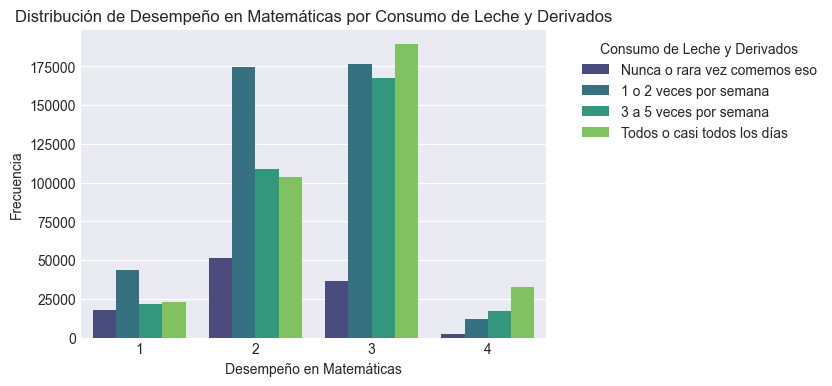

In [86]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='FAMI_COMELECHEDERIVADOS', palette='viridis')
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Consumo de Leche y Derivados')

# Cambia las leyendas utilizando el parámetro labels en legend
leyendas = {
    1: '1 o 2 veces por semana',
    3: 'Todos o casi todos los días',
    2: '3 a 5 veces por semana',
    0: 'Nunca o rara vez comemos eso'
}

# Extrae los nombres de las leyendas en el orden correcto
legend_labels = [leyendas[key] for key in sorted(leyendas.keys())]

# Ajusta la ubicación de la leyenda y asigna las etiquetas manualmente
plt.legend(title='Consumo de Leche y Derivados', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



### 2.2.21. FAMI_TIENECONSOLAVIDEOJUEGOS

In [87]:
df2['FAMI_TIENECONSOLAVIDEOJUEGOS'].value_counts()

FAMI_TIENECONSOLAVIDEOJUEGOS
No    928211
Si    249437
Name: count, dtype: int64

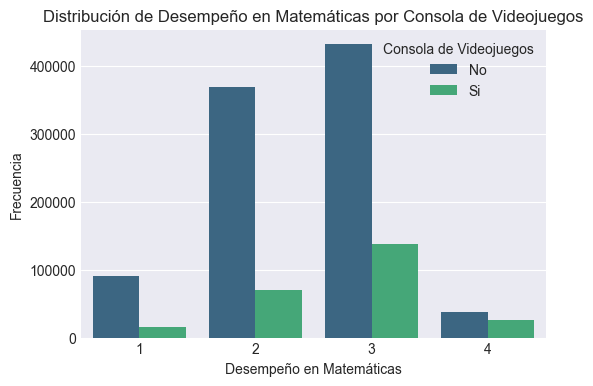

In [88]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='FAMI_TIENECONSOLAVIDEOJUEGOS', palette='viridis')
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Consola de Videojuegos')
plt.legend(title='Consola de Videojuegos')
plt.show()

In [89]:
# Crear la nueva variable utilizando la función apply
df2['FAMI_TIENECONSOLAVIDEOJUEGOS'] = df2['FAMI_TIENECONSOLAVIDEOJUEGOS'].apply(lambda x: 1 if x == 'Si' else 0)
df2['FAMI_TIENECONSOLAVIDEOJUEGOS'].value_counts()

FAMI_TIENECONSOLAVIDEOJUEGOS
0    928211
1    249437
Name: count, dtype: int64

### 2.2.22. COLE_GENERO

In [90]:
df2['COLE_GENERO'].value_counts()

COLE_GENERO
MIXTO        1129871
FEMENINO       35731
MASCULINO      12046
Name: count, dtype: int64

In [91]:
# Crear la nueva variable utilizando la función apply
df2['COLE_MIXTO'] = df2['COLE_GENERO'].apply(lambda x: 1 if x == 'MIXTO' else 0)
df2.drop('COLE_GENERO',axis=1,inplace=True)
df2['COLE_MIXTO'].value_counts()

COLE_MIXTO
1    1129871
0      47777
Name: count, dtype: int64

### 2.2.23. FAMI_TIENEINTERNET

In [92]:
df2['FAMI_TIENEINTERNET'].value_counts()

FAMI_TIENEINTERNET
Si    874721
No    302927
Name: count, dtype: int64

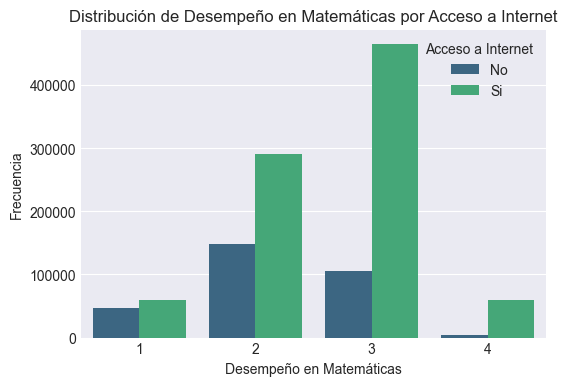

In [93]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='FAMI_TIENEINTERNET', palette='viridis')
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Acceso a Internet')
plt.legend(title='Acceso a Internet')
plt.show()

In [94]:
# Crear la nueva variable utilizando la función apply
df2['FAMI_TIENEINTERNET'] = df2['FAMI_TIENEINTERNET'].apply(lambda x: 1 if x == 'Si' else 0)
df2['FAMI_TIENEINTERNET'].value_counts()

FAMI_TIENEINTERNET
1    874721
0    302927
Name: count, dtype: int64

### 2.2.24. ESTU_HORASSEMANATRABAJA

In [95]:
df2['ESTU_HORASSEMANATRABAJA'].value_counts()

ESTU_HORASSEMANATRABAJA
0                      738511
Menos de 10 horas      239814
Entre 11 y 20 horas    110705
Más de 30 horas         46480
Entre 21 y 30 horas     42138
Name: count, dtype: int64

In [96]:
# Crear la nueva variable utilizando la función apply
df2['ESTU_TRABAJA'] = df2['ESTU_HORASSEMANATRABAJA'].apply(lambda x: 0 if x == '0' else 1)
df2.drop('ESTU_HORASSEMANATRABAJA',axis=1,inplace=True)
df2['ESTU_TRABAJA'].value_counts()

ESTU_TRABAJA
0    738511
1    439137
Name: count, dtype: int64

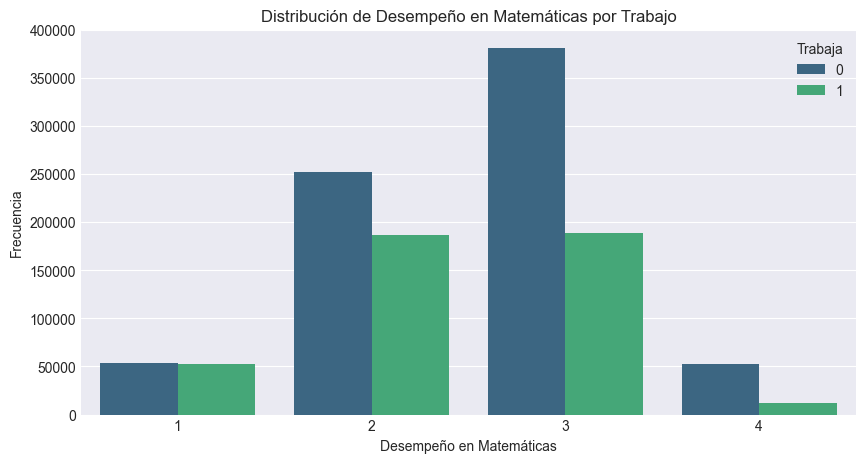

In [97]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='ESTU_TRABAJA', palette='viridis')
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Trabajo')
plt.legend(title='Trabaja')
plt.show()

### 2.2.25. COLE_BILINGUE

In [98]:
df2['COLE_BILINGUE'].value_counts()

COLE_BILINGUE
N    1153593
S      24055
Name: count, dtype: int64

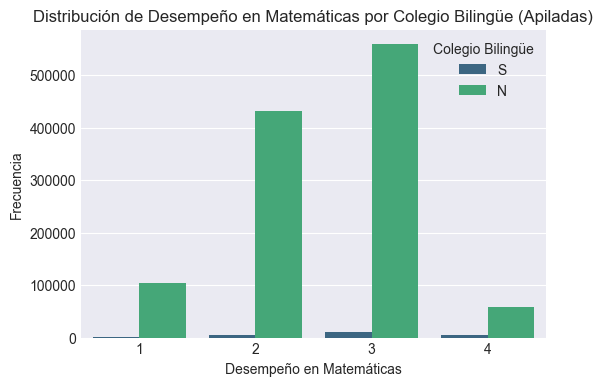

In [99]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='DESEMP_MATEMATICAS', hue='COLE_BILINGUE', palette='viridis')
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Colegio Bilingüe (Apiladas)')
plt.legend(title='Colegio Bilingüe')
plt.show()

In [100]:
# Crear la nueva variable utilizando la función apply
df2['COLE_BILINGUE'] = df2['COLE_BILINGUE'].apply(lambda x: 1 if x == 'S' else 0)
df2['COLE_BILINGUE'].value_counts()

COLE_BILINGUE
0    1153593
1      24055
Name: count, dtype: int64

### 2.3. Resumen

In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1177648 entries, 0 to 1621654
Data columns (total 27 columns):
 #   Column                        Non-Null Count    Dtype
---  ------                        --------------    -----
 0   DESEMP_MATEMATICAS            1177648 non-null  int64
 1   FAMI_CUARTOSHOGAR             1177648 non-null  int64
 2   ESTU_DEDICACIONLECTURADIARIA  1177648 non-null  int64
 3   FAMI_ESTRATOVIVIENDA          1177648 non-null  int64
 4   ESTU_DEDICACIONINTERNET       1177648 non-null  int64
 5   FAMI_COMECARNEPESCADOHUEVO    1177648 non-null  int64
 6   FAMI_TIENECOMPUTADOR          1177648 non-null  int64
 7   FAMI_PERSONASHOGAR            1177648 non-null  int64
 8   FAMI_NUMLIBROS                1177648 non-null  int64
 9   ESTU_TIENEETNIA               1177648 non-null  int64
 10  FAMI_TIENEAUTOMOVIL           1177648 non-null  int64
 11  FAMI_TIENESERVICIOTV          1177648 non-null  int64
 12  FAMI_COMELECHEDERIVADOS       1177648 non-null  int64
 13  FA

### 3. Balaceo de Datos

In [102]:
df2['DESEMP_MATEMATICAS'].value_counts()

DESEMP_MATEMATICAS
3    569519
2    438166
1    105801
4     64162
Name: count, dtype: int64

In [103]:
df2.shape

(1177648, 27)

In [104]:
569519/1177648

0.48360715595831694

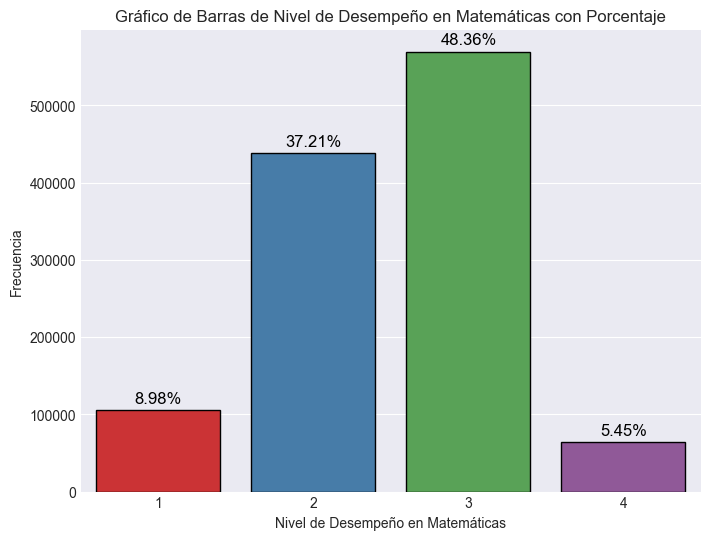

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame df2 ya debe contener tus datos

# Crear un gráfico de barras con la paleta Set1 y mostrar porcentajes
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df2, x='DESEMP_MATEMATICAS', palette='Set1', edgecolor='black')

# Calcular porcentajes y mostrarlos en las barras
total = len(df2)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Agregar etiquetas y título
plt.xlabel('Nivel de Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de Nivel de Desempeño en Matemáticas con Porcentaje')

# Mostrar el gráfico de barras
plt.show()

In [106]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Mostrar el recuento de clases antes del balanceo
print("Recuento de clases antes del balanceo:")
print(df2['DESEMP_MATEMATICAS'].value_counts())

# Realizar sobremuestreo (oversampling) con RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = oversampler.fit_resample(df2.drop('DESEMP_MATEMATICAS', axis=1), df2['DESEMP_MATEMATICAS'])

# Convertir los datos sobremuestreados en un DataFrame de pandas
df2_over = pd.DataFrame(X_over, columns=df2.drop('DESEMP_MATEMATICAS', axis=1).columns)
df2_over['DESEMP_MATEMATICAS'] = y_over

# Mostrar el recuento de clases después del sobremuestreo
print("\nRecuento de clases después del sobremuestreo:")
print(df2_over['DESEMP_MATEMATICAS'].value_counts())

# Realizar submuestreo (undersampling) con RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_under, y_under = undersampler.fit_resample(df2.drop('DESEMP_MATEMATICAS', axis=1), df2['DESEMP_MATEMATICAS'])

# Convertir los datos submuestreados en un DataFrame de pandas
df2_under = pd.DataFrame(X_under, columns=df2.drop('DESEMP_MATEMATICAS', axis=1).columns)
df2_under['DESEMP_MATEMATICAS'] = y_under

# Mostrar el recuento de clases después del submuestreo
print("\nRecuento de clases después del submuestreo:")
print(df2_under['DESEMP_MATEMATICAS'].value_counts())


Recuento de clases antes del balanceo:
DESEMP_MATEMATICAS
3    569519
2    438166
1    105801
4     64162
Name: count, dtype: int64

Recuento de clases después del sobremuestreo:
DESEMP_MATEMATICAS
1    569519
2    569519
3    569519
4    569519
Name: count, dtype: int64

Recuento de clases después del submuestreo:
DESEMP_MATEMATICAS
1    64162
2    64162
3    64162
4    64162
Name: count, dtype: int64


## 4. Selección de características

In [107]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre las dos variables
contingency_table = pd.crosstab(df2['DESEMP_MATEMATICAS'], df2['FAMI_ESTRATOVIVIENDA'])

# Realizar la prueba chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Establecer un umbral de significancia (alpha)
alpha = 0.05

# Imprimir los resultados
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Decidir si las variables son independientes o no
if p < alpha:
    print("Las variables DESEMP_MATEMATICAS y FAMI_CUARTOSHOGAR son dependientes.")
else:
    print("Las variables DESEMP_MATEMATICAS y FAMI_CUARTOSHOGAR son independientes.")
contingency_table

Chi-Square Statistic: 78572.71283366752
P-Value: 0.0
Las variables DESEMP_MATEMATICAS y FAMI_CUARTOSHOGAR son dependientes.


FAMI_ESTRATOVIVIENDA,0,1,2,3,4,5,6
DESEMP_MATEMATICAS,,,,,,,
1,8706,37120,33573,17485,5315,2144,1458
2,17820,148672,164287,82773,16999,5162,2453
3,8096,145770,218316,144339,35131,11665,6202
4,468,8566,17981,18356,10182,5080,3529


In [108]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'p_value', 'Decision'])

# Iterar a través de las columnas del DataFrame (variables categóricas)
for column in df2_over.columns:
    if column != 'DESEMP_MATEMATICAS':  # Excluir la variable objetivo
        # Crear una tabla de contingencia entre la variable y la variable objetivo
        contingency_table = pd.crosstab(df2[column], df2['DESEMP_MATEMATICAS'])
        
        # Realizar la prueba chi-cuadrado
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Establecer un umbral de significancia (alpha)
        alpha = 0.05
        
        # Decidir si conservar o no la variable
        if p < alpha:
            decision = 'Conservar'
        else:
            decision = 'Eliminar'
        
        # Agregar los resultados a la tabla
        results_df = pd.concat([results_df, pd.DataFrame({'Variable': [column], 'Chi-Square Statistic': [chi2], 'p_value': ["{:.30e}".format(p)], 'Decision': [decision]})], ignore_index=True)

# Mostrar la tabla de resultados
results_df


,Variable,Chi-Square Statistic,p_value,Decision
0,FAMI_CUARTOSHOGAR,10103.939788,0.000000000000000000000000000000e+00,Conservar
1,ESTU_DEDICACIONLECTURADIARIA,14700.425377,0.000000000000000000000000000000e+00,Conservar
2,FAMI_ESTRATOVIVIENDA,78572.712834,0.000000000000000000000000000000e+00,Conservar
3,ESTU_DEDICACIONINTERNET,48329.461466,0.000000000000000000000000000000e+00,Conservar
4,FAMI_COMECARNEPESCADOHUEVO,40010.776351,0.000000000000000000000000000000e+00,Conservar
5,FAMI_TIENECOMPUTADOR,75540.010068,0.000000000000000000000000000000e+00,Conservar
6,FAMI_PERSONASHOGAR,17273.823692,0.000000000000000000000000000000e+00,Conservar
7,FAMI_NUMLIBROS,78330.713561,0.000000000000000000000000000000e+00,Conservar
8,ESTU_TIENEETNIA,22841.895122,0.000000000000000000000000000000e+00,Conservar
9,FAMI_TIENEAUTOMOVIL,48027.970815,0.000000000000000000000000000000e+00,Conservar


In [109]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Crear un DataFrame para almacenar los resultados
results_df2 = pd.DataFrame(columns=['Variable', 'Cramer\'s V', 'Decision'])

# Iterar a través de las columnas del DataFrame (variables categóricas)
for column in df2_under.columns:
    if column != 'DESEMP_MATEMATICAS':  # Excluir la variable objetivo
        # Crear una tabla de contingencia entre la variable y la variable objetivo
        contingency_table = pd.crosstab(df2[column], df2['DESEMP_MATEMATICAS'])
        
        # Calcular el coeficiente de Cramer
        cramers_value = cramers_v(contingency_table.values)
        
        # Establecer un umbral de importancia
        alpha = 0.1
        
        # Decidir si conservar o no la variable
        if abs(cramers_value) > alpha:
            decision = 'Conservar'
        else:
            decision = 'Eliminar'
        
        # Agregar los resultados a results_df2
        results_df2 = pd.concat([results_df2, pd.DataFrame({'Variable': [column], 'Cramer\'s V': [cramers_value], 'Decision': [decision]})], ignore_index=True)

# Mostrar la tabla de resultados
results_df2



,Variable,Cramer's V,Decision
0,FAMI_CUARTOSHOGAR,0.053478,Eliminar
1,ESTU_DEDICACIONLECTURADIARIA,0.064505,Eliminar
2,FAMI_ESTRATOVIVIENDA,0.149131,Conservar
3,ESTU_DEDICACIONINTERNET,0.116960,Conservar
4,FAMI_COMECARNEPESCADOHUEVO,0.106419,Conservar
5,FAMI_TIENECOMPUTADOR,0.253268,Conservar
6,FAMI_PERSONASHOGAR,0.069924,Eliminar
7,FAMI_NUMLIBROS,0.148901,Conservar
8,ESTU_TIENEETNIA,0.139270,Conservar
9,FAMI_TIENEAUTOMOVIL,0.201948,Conservar


Borremos las variables que no son significativas:

In [110]:
df3 = df2.drop(['FAMI_CUARTOSHOGAR','ESTU_DEDICACIONLECTURADIARIA','FAMI_PERSONASHOGAR','COLE_DEPTO_GRANDE',
          'COLE_TECNICO', 'año'],axis=1)
df3_under = df2_under.drop(['FAMI_CUARTOSHOGAR','ESTU_DEDICACIONLECTURADIARIA','FAMI_PERSONASHOGAR','COLE_DEPTO_GRANDE',
          'COLE_TECNICO', 'año'],axis=1)
df3_over = df2_over.drop(['FAMI_CUARTOSHOGAR','ESTU_DEDICACIONLECTURADIARIA','FAMI_PERSONASHOGAR','COLE_DEPTO_GRANDE',
          'COLE_TECNICO', 'año'],axis=1)

## 5. Construcción de modelos

In [115]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import f1_score
from focal_loss import SparseCategoricalFocalLoss
from tensorflow.keras.metrics import Accuracy

### 5.1. Sin balanceo y entropia cruzada

In [116]:
# Separar las características (X) de la variable objetivo (y)
X = df3.drop('DESEMP_MATEMATICAS', axis=1)
y = df3['DESEMP_MATEMATICAS']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas y función de activación softmax
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam',  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

### 5.2. Sin balanceo y perdida focal

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(4, activation='softmax')
])

# Compilar el modelo con Focal Loss y métrica de precisión
model.compile(optimizer='adam',
              loss=SparseCategoricalFocalLoss(gamma=2.0),
              metrics=['accuracy'])

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train_encoded)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

### 5.3. Subalanceada y entropia cruzada

In [ ]:
# Separar las características (X) de la variable objetivo (y)
X = df3_under.drop('DESEMP_MATEMATICAS', axis=1)
y = df3_under['DESEMP_MATEMATICAS']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas y función de activación softmax
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam',  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

### 5.4. Submuestreo con pérdida Focal

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(4, activation='softmax')
])

# Compilar el modelo con Focal Loss y métrica de precisión
model.compile(optimizer='adam',
              loss=SparseCategoricalFocalLoss(gamma=2.0),
              metrics=['accuracy'])

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train_encoded)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

### 5.5. Sobremuestreo y entropia cruzada

In [ ]:
# Separar las características (X) de la variable objetivo (y)
X = df3_over.drop('DESEMP_MATEMATICAS', axis=1)
y = df3_over['DESEMP_MATEMATICAS']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas y función de activación softmax
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam',  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

### 5.6. Sobremuestreo y perdida focal

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(4, activation='softmax')
])

# Compilar el modelo con Focal Loss y métrica de precisión
model.compile(optimizer='adam',
              loss=SparseCategoricalFocalLoss(gamma=2.0),
              metrics=['accuracy'])

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train_encoded)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

## 6. Regularización e hiperparámetros

### 6.1. Regularización L1, L2

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

# Separar las características (X) de la variable objetivo (y)
X = df3.drop('DESEMP_MATEMATICAS', axis=1)
y = df3['DESEMP_MATEMATICAS']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(20,)),
    layers.Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

# Compilar el modelo
model.compile(optimizer='adam',  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

### 6.2. Ajuste de hiperparámetros

In [ ]:
import math
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras import layers

# Definir la tasa de aprendizaje inicial
initial_learning_rate = 0.001

# Definir la función de disminución de la tasa de aprendizaje
def lr_schedule(epoch):
    initial_lr = initial_learning_rate
    drop = 0.5  # Factor de disminución
    epochs_drop = 2  # Épocas después de las cuales se disminuirá la tasa de aprendizaje
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas y función de activación relu
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo con el optimizador personalizado y la función de pérdida
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Definir el callback para la disminución de la tasa de aprendizaje
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2, callbacks=[learning_rate_scheduler])

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')


In [ ]:
from tensorflow.keras.optimizers import Adam

# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas y función de activación softmax
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.1),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

In [ ]:
from tensorflow.keras.optimizers import Adam

# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas y función de activación softmax
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.00001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas y función de activación softmax
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

### 6.4. Numero de neuronas y capas

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(64, activation='relu'),  # Capa oculta con 64 neuronas    
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Precisión en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(128, activation='relu'),  # Capa oculta con 64 neuronas    
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Exactitud en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

In [135]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(32, activation='relu'),  # Capa oculta con 64 neuronas    
    layers.Dense(32, activation='relu'),  # Capa oculta con 64 neuronas 
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Exactitud en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

Epoch 1/10
23553/23553 [==============================] - 28s 1ms/step - loss: 0.9918 - accuracy: 0.5447 - val_loss: 0.9857 - val_accuracy: 0.5476
Epoch 2/10
23553/23553 [==============================] - 27s 1ms/step - loss: 0.9862 - accuracy: 0.5472 - val_loss: 0.9850 - val_accuracy: 0.5471
Epoch 3/10
23553/23553 [==============================] - 27s 1ms/step - loss: 0.9851 - accuracy: 0.5483 - val_loss: 0.9832 - val_accuracy: 0.5484
Epoch 4/10
23553/23553 [==============================] - 26s 1ms/step - loss: 0.9843 - accuracy: 0.5480 - val_loss: 0.9838 - val_accuracy: 0.5481
Epoch 5/10
23553/23553 [==============================] - 27s 1ms/step - loss: 0.9837 - accuracy: 0.5483 - val_loss: 0.9826 - val_accuracy: 0.5487
Epoch 6/10
23553/23553 [==============================] - 27s 1ms/step - loss: 0.9833 - accuracy: 0.5482 - val_loss: 0.9829 - val_accuracy: 0.5487
Epoch 7/10
23553/23553 [==============================] - 26s 1ms/step - loss: 0.9830 - accuracy: 0.5491 - val_loss: 0

In [136]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Exactitud en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

Epoch 1/10
23553/23553 [==============================] - 25s 1ms/step - loss: 0.9904 - accuracy: 0.5452 - val_loss: 0.9849 - val_accuracy: 0.5486
Epoch 2/10
23553/23553 [==============================] - 25s 1ms/step - loss: 0.9851 - accuracy: 0.5480 - val_loss: 0.9832 - val_accuracy: 0.5493
Epoch 3/10
23553/23553 [==============================] - 24s 1ms/step - loss: 0.9839 - accuracy: 0.5485 - val_loss: 0.9832 - val_accuracy: 0.5487
Epoch 4/10
23553/23553 [==============================] - 24s 1ms/step - loss: 0.9832 - accuracy: 0.5489 - val_loss: 0.9835 - val_accuracy: 0.5481
Epoch 5/10
23553/23553 [==============================] - 24s 1ms/step - loss: 0.9828 - accuracy: 0.5491 - val_loss: 0.9854 - val_accuracy: 0.5476
Epoch 6/10
23553/23553 [==============================] - 26s 1ms/step - loss: 0.9824 - accuracy: 0.5496 - val_loss: 0.9838 - val_accuracy: 0.5484
Epoch 7/10
23553/23553 [==============================] - 24s 1ms/step - loss: 0.9823 - accuracy: 0.5493 - val_loss: 0

In [137]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(64, activation='relu'),  # Capa oculta con 64 neuronas    
    layers.Dense(128, activation='relu'),  # Capa oculta con 64 neuronas 
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Exactitud en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

Epoch 1/10
23553/23553 [==============================] - 29s 1ms/step - loss: 0.9910 - accuracy: 0.5450 - val_loss: 0.9883 - val_accuracy: 0.5460
Epoch 2/10
23553/23553 [==============================] - 31s 1ms/step - loss: 0.9857 - accuracy: 0.5475 - val_loss: 0.9855 - val_accuracy: 0.5465
Epoch 3/10
23553/23553 [==============================] - 28s 1ms/step - loss: 0.9846 - accuracy: 0.5481 - val_loss: 0.9861 - val_accuracy: 0.5497
Epoch 4/10
23553/23553 [==============================] - 27s 1ms/step - loss: 0.9839 - accuracy: 0.5485 - val_loss: 0.9833 - val_accuracy: 0.5490
Epoch 5/10
23553/23553 [==============================] - 32s 1ms/step - loss: 0.9834 - accuracy: 0.5493 - val_loss: 0.9844 - val_accuracy: 0.5486
Epoch 6/10
23553/23553 [==============================] - 32s 1ms/step - loss: 0.9831 - accuracy: 0.5490 - val_loss: 0.9832 - val_accuracy: 0.5491
Epoch 7/10
23553/23553 [==============================] - 32s 1ms/step - loss: 0.9827 - accuracy: 0.5491 - val_loss: 0

### 6.5. Epochs y batch_size

In [139]:
# Crear el modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenar el modelo en tus datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en tus datos de prueba (X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Exactitud en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

Epoch 1/50
23553/23553 [==============================] - 24s 1ms/step - loss: 0.9919 - accuracy: 0.5445 - val_loss: 0.9848 - val_accuracy: 0.5489
Epoch 2/50
23553/23553 [==============================] - 24s 1ms/step - loss: 0.9855 - accuracy: 0.5478 - val_loss: 0.9848 - val_accuracy: 0.5480
Epoch 3/50
23553/23553 [==============================] - 23s 991us/step - loss: 0.9841 - accuracy: 0.5483 - val_loss: 0.9843 - val_accuracy: 0.5492
Epoch 4/50
23553/23553 [==============================] - 24s 999us/step - loss: 0.9835 - accuracy: 0.5491 - val_loss: 0.9838 - val_accuracy: 0.5493
Epoch 5/50
23553/23553 [==============================] - 23s 993us/step - loss: 0.9831 - accuracy: 0.5488 - val_loss: 0.9831 - val_accuracy: 0.5481
Epoch 6/50
23553/23553 [==============================] - 23s 997us/step - loss: 0.9827 - accuracy: 0.5492 - val_loss: 0.9833 - val_accuracy: 0.5491
Epoch 7/50
23553/23553 [==============================] - 24s 1ms/step - loss: 0.9825 - accuracy: 0.5490 - val

In [113]:
from tensorflow.keras.optimizers import Adam

In [117]:
# Construcción del modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilación del modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenamiento del modelo en los datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Exactitud en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

Epoch 1/10
23553/23553 [==============================] - 33s 1ms/step - loss: 0.9914 - accuracy: 0.5449 - val_loss: 0.9875 - val_accuracy: 0.5489
Epoch 2/10
23553/23553 [==============================] - 32s 1ms/step - loss: 0.9855 - accuracy: 0.5475 - val_loss: 0.9835 - val_accuracy: 0.5489
Epoch 3/10
23553/23553 [==============================] - 33s 1ms/step - loss: 0.9843 - accuracy: 0.5482 - val_loss: 0.9852 - val_accuracy: 0.5473
Epoch 4/10
23553/23553 [==============================] - 34s 1ms/step - loss: 0.9836 - accuracy: 0.5486 - val_loss: 0.9877 - val_accuracy: 0.5471
Epoch 5/10
23553/23553 [==============================] - 34s 1ms/step - loss: 0.9833 - accuracy: 0.5489 - val_loss: 0.9821 - val_accuracy: 0.5501
Epoch 6/10
23553/23553 [==============================] - 34s 1ms/step - loss: 0.9829 - accuracy: 0.5492 - val_loss: 0.9819 - val_accuracy: 0.5498
Epoch 7/10
23553/23553 [==============================] - 34s 1ms/step - loss: 0.9826 - accuracy: 0.5493 - val_loss: 0

In [119]:
# Construcción del modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilación del modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenamiento del modelo en los datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=20, batch_size=128, validation_split=0.2)

# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Exactitud en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

Epoch 1/20
5889/5889 [==============================] - 7s 1ms/step - loss: 0.9940 - accuracy: 0.5439 - val_loss: 0.9885 - val_accuracy: 0.5444
Epoch 2/20
5889/5889 [==============================] - 7s 1ms/step - loss: 0.9858 - accuracy: 0.5476 - val_loss: 0.9854 - val_accuracy: 0.5467
Epoch 3/20
5889/5889 [==============================] - 7s 1ms/step - loss: 0.9842 - accuracy: 0.5488 - val_loss: 0.9839 - val_accuracy: 0.5478
Epoch 4/20
5889/5889 [==============================] - 6s 1ms/step - loss: 0.9833 - accuracy: 0.5489 - val_loss: 0.9833 - val_accuracy: 0.5490
Epoch 5/20
5889/5889 [==============================] - 6s 1ms/step - loss: 0.9827 - accuracy: 0.5494 - val_loss: 0.9822 - val_accuracy: 0.5488
Epoch 6/20
5889/5889 [==============================] - 7s 1ms/step - loss: 0.9822 - accuracy: 0.5495 - val_loss: 0.9820 - val_accuracy: 0.5500
Epoch 7/20
5889/5889 [==============================] - 7s 1ms/step - loss: 0.9820 - accuracy: 0.5497 - val_loss: 0.9814 - val_accuracy:

In [121]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [124]:
# Construcción del modelo
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # Capa oculta con 64 neuronas
    layers.Dense(4, activation='softmax')  # Capa de salida con 4 categorías y función de activación softmax
])

# Compilación del modelo
model.compile(optimizer= Adam(learning_rate=0.001),  # Algoritmo de optimización
              loss='sparse_categorical_crossentropy',  # Función de pérdida de entropía cruzada categórica
              metrics=['accuracy'])  # Métrica de precisión

# Entrenamiento del modelo en los datos de entrenamiento (X_train, y_train)
history = model.fit(X_train, y_train-1, epochs=20, batch_size=64, validation_split=0.2)

# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test-1)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el F1-score
f1 = f1_score(y_test-1, y_pred_classes, average='weighted')

# Imprimir la precisión y el F1-score en los datos de prueba
print(f'Exactitud en datos de prueba: {test_accuracy}')
print(f'F1-score en datos de prueba: {f1}')

Epoch 1/20
11777/11777 [==============================] - 13s 1ms/step - loss: 0.9919 - accuracy: 0.5447 - val_loss: 0.9861 - val_accuracy: 0.5482
Epoch 2/20
11777/11777 [==============================] - 12s 1ms/step - loss: 0.9853 - accuracy: 0.5478 - val_loss: 0.9852 - val_accuracy: 0.5485
Epoch 3/20
11777/11777 [==============================] - 12s 1ms/step - loss: 0.9840 - accuracy: 0.5485 - val_loss: 0.9831 - val_accuracy: 0.5487
Epoch 4/20
11777/11777 [==============================] - 12s 1ms/step - loss: 0.9832 - accuracy: 0.5489 - val_loss: 0.9828 - val_accuracy: 0.5484
Epoch 5/20
11777/11777 [==============================] - 12s 1ms/step - loss: 0.9827 - accuracy: 0.5492 - val_loss: 0.9848 - val_accuracy: 0.5475
Epoch 6/20
11777/11777 [==============================] - 13s 1ms/step - loss: 0.9823 - accuracy: 0.5492 - val_loss: 0.9835 - val_accuracy: 0.5483
Epoch 7/20
11777/11777 [==============================] - 13s 1ms/step - loss: 0.9821 - accuracy: 0.5494 - val_loss: 0

### Importancia de variables

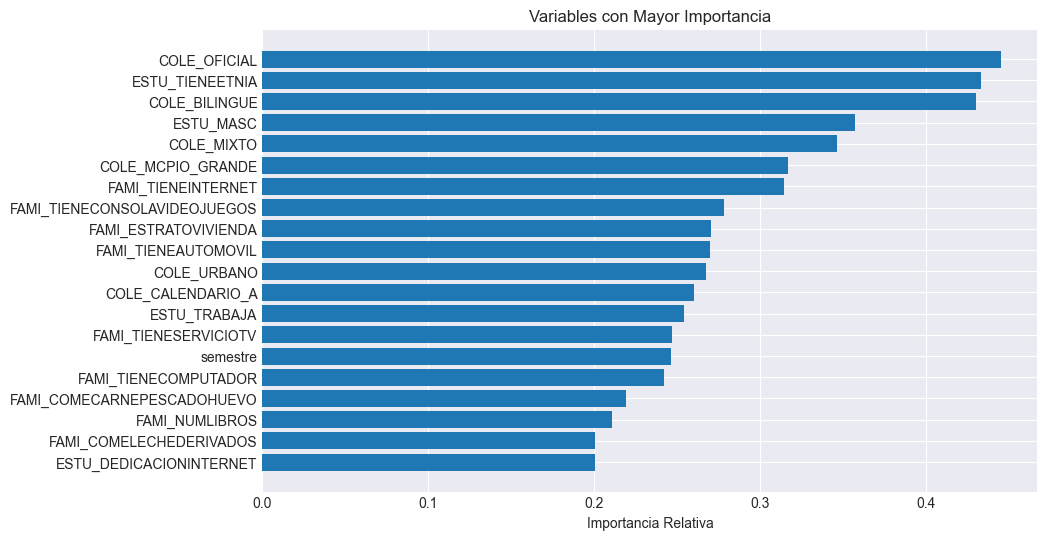

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Obtén los pesos de la primera capa (capa de entrada)
first_layer_weights = model.layers[0].get_weights()[0]

# Calcula la importancia relativa de las variables como el valor absoluto de los pesos promedio
variable_importance = np.abs(first_layer_weights).mean(axis=1)

# Obtén los nombres de las variables (asumiendo que tienes una lista de nombres de características)
variable_names = X_train.columns.tolist() 

# Ordena las variables por importancia (de mayor a menor)
sorted_indices = np.argsort(variable_importance)[::-1]
sorted_variable_importance = variable_importance[sorted_indices]
sorted_variable_names = [variable_names[i] for i in sorted_indices]

# Crea la gráfica de barras
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_variable_importance)), sorted_variable_importance)
plt.yticks(range(len(sorted_variable_importance)), sorted_variable_names)
plt.xlabel('Importancia Relativa')
plt.title('Variables con Mayor Importancia')
plt.gca().invert_yaxis()  # Invierte el eje y para que las barras más largas estén arriba
plt.show()

In [127]:
df2['COLE_OFICIAL']

0          1
4          0
7          0
8          0
11         0
          ..
1621649    1
1621650    1
1621651    1
1621653    0
1621654    0
Name: COLE_OFICIAL, Length: 1177648, dtype: int64

In [129]:
tabla_conteo = pd.crosstab(df3['COLE_OFICIAL'], df3['DESEMP_MATEMATICAS'])

# Mostrar la tabla de conteo
print(tabla_conteo)

DESEMP_MATEMATICAS      1       2       3      4
COLE_OFICIAL                                    
0                   13501   62260  154218  36858
1                   92300  375906  415301  27304


### Analisis Etnia

In [130]:
df3['ESTU_TIENEETNIA']

0          0
4          0
7          0
8          0
11         0
          ..
1621649    0
1621650    0
1621651    1
1621653    0
1621654    0
Name: ESTU_TIENEETNIA, Length: 1177648, dtype: int64

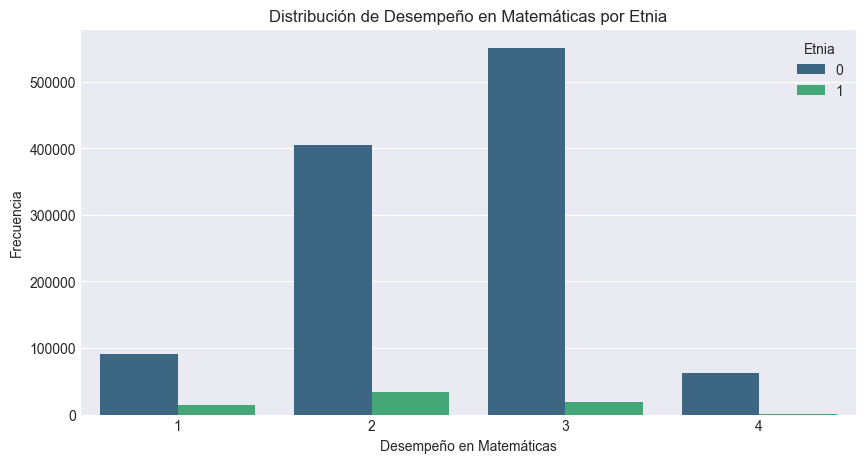

In [135]:
# Crear el gráfico de barras apiladas utilizando Seaborn
plt.figure(figsize=(10, 5))
sns.countplot(data=df3, x='DESEMP_MATEMATICAS', hue='ESTU_TIENEETNIA', palette='viridis', dodge=True)
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas por Etnia')
plt.legend(title='Etnia')
plt.show()

In [131]:
tabla_conteo = pd.crosstab(df3['ESTU_TIENEETNIA'], df3['DESEMP_MATEMATICAS'])

# Mostrar la tabla de conteo
print(tabla_conteo)

DESEMP_MATEMATICAS      1       2       3      4
ESTU_TIENEETNIA                                 
0                   91642  404625  550735  63197
1                   14159   33541   18784    965


### Analisis Bilingue

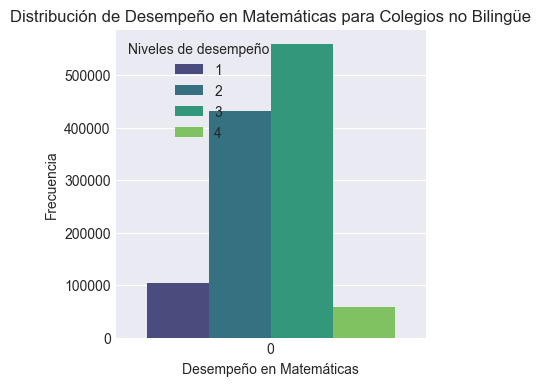

In [155]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df2[df2['COLE_BILINGUE']==0], x='COLE_BILINGUE', hue='DESEMP_MATEMATICAS', palette='viridis')
plt.xlabel('Desempeño en Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Desempeño en Matemáticas para Colegios no Bilingüe')
plt.legend(title='Niveles de desempeño', loc='upper left', bbox_to_anchor=(0.0, 1))
plt.show()


In [137]:
tabla_conteo = pd.crosstab(df3['COLE_BILINGUE'], df3['DESEMP_MATEMATICAS'])

# Mostrar la tabla de conteo
print(tabla_conteo)

DESEMP_MATEMATICAS       1       2       3      4
COLE_BILINGUE                                    
0                   103822  432443  558619  58709
1                     1979    5723   10900   5453
